In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk


In [3]:
fake_news = pd.read_csv("Fake.csv")
real_news = pd.read_csv("True.csv")

print(fake_news.shape)
print(real_news.shape)

(23481, 4)
(21417, 4)


In [4]:
# First we need to one more column to the dataset
# F or R: F when the news is fake, R when the news is real
fake_news['Fake or Real'] = 'F'
real_news['Fake or Real'] = 'R'


In [5]:
# check dataset
fake_news.head()

,title,text,subject,date,Fake or Real
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",F
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",F
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",F
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",F
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",F


In [6]:
# check dataset
real_news.head()

,title,text,subject,date,Fake or Real
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",R
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",R
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",R
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",R
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",R


In [7]:
# Concatenate two dataset together
news = pd.concat([fake_news, real_news], ignore_index = True)

# Shuffle the original dataset and reset the index
news = news.sample(frac = 1).reset_index(drop=True)

news


,title,text,subject,date,Fake or Real
0,What Will Happen to Your Guns Under President ...,21st Century Wire says Legacy note to Obama s ...,Middle-east,"March 14, 2017",F
1,SECOND MAJOR MAKEUP MANUFACTURER Chooses Man W...,Makeup Artist Manny Gutierrez is the first man...,politics,"Jan 5, 2017",F
2,"Russia, Turkey hope Astana peace talks will le...",MOSCOW (Reuters) - Russian President Vladimir ...,worldnews,"December 22, 2017",R
3,Here’s A Look At The Obama Administration Sca...,"Eight years ago, the right-wing media was obse...",News,"June 9, 2017",F
4,WATCH REAGAN WARN US AND DRAW BATTLE LINES…Tru...,President Reagan Warned Of The Dangers Of Libe...,politics,"Jul 30, 2017",F
...,...,...,...,...,...
44893,Iowa Legislator Leaves Republican Party Over ...,For almost an entire year Donald Trump insulte...,News,"June 7, 2016",F
44894,Obama unveils wage insurance plan to spur job ...,WASHINGTON - U.S. President Barack Obama on Sa...,politicsNews,"January 16, 2016",R
44895,Uruguay vice president quits amid probe into u...,MONTEVIDEO (Reuters) - Uruguay s Vice Presiden...,worldnews,"September 9, 2017",R
44896,Peru president vowed to free Fujimori to win s...,LIMA (Reuters) - A congresswoman in Peru said ...,worldnews,"December 22, 2017",R


In [8]:
#news = pd.read_csv("test_news_enter.csv")

In [9]:
## Conver the date column to datetime object and then add one column of dayofweek
def convert_date_improved(date_str):
    try:
        return pd.to_datetime(date_str)
    except:
        return pd.NaT

news['date'] = news['date'].apply(convert_date_improved)

news.dropna(subset=['date'], inplace=True)

news = news.reset_index(drop=True)

news['DayOfWeek'] = news['date'].dt.dayofweek + 1

news

,title,text,subject,date,Fake or Real,DayOfWeek
0,What Will Happen to Your Guns Under President ...,21st Century Wire says Legacy note to Obama s ...,Middle-east,2017-03-14,F,2
1,SECOND MAJOR MAKEUP MANUFACTURER Chooses Man W...,Makeup Artist Manny Gutierrez is the first man...,politics,2017-01-05,F,4
2,"Russia, Turkey hope Astana peace talks will le...",MOSCOW (Reuters) - Russian President Vladimir ...,worldnews,2017-12-22,R,5
3,Here’s A Look At The Obama Administration Sca...,"Eight years ago, the right-wing media was obse...",News,2017-06-09,F,5
4,WATCH REAGAN WARN US AND DRAW BATTLE LINES…Tru...,President Reagan Warned Of The Dangers Of Libe...,politics,2017-07-30,F,7
...,...,...,...,...,...,...
44883,Iowa Legislator Leaves Republican Party Over ...,For almost an entire year Donald Trump insulte...,News,2016-06-07,F,2
44884,Obama unveils wage insurance plan to spur job ...,WASHINGTON - U.S. President Barack Obama on Sa...,politicsNews,2016-01-16,R,6
44885,Uruguay vice president quits amid probe into u...,MONTEVIDEO (Reuters) - Uruguay s Vice Presiden...,worldnews,2017-09-09,R,6
44886,Peru president vowed to free Fujimori to win s...,LIMA (Reuters) - A congresswoman in Peru said ...,worldnews,2017-12-22,R,5


#### Plot by month

C:\Users\86130\AppData\Local\Temp\ipykernel_73812\4124272602.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  real_grouped = real.groupby('year_month').apply(len)
C:\Users\86130\AppData\Local\Temp\ipykernel_73812\4124272602.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fake_grouped = fake.groupby('year_month').apply(len)


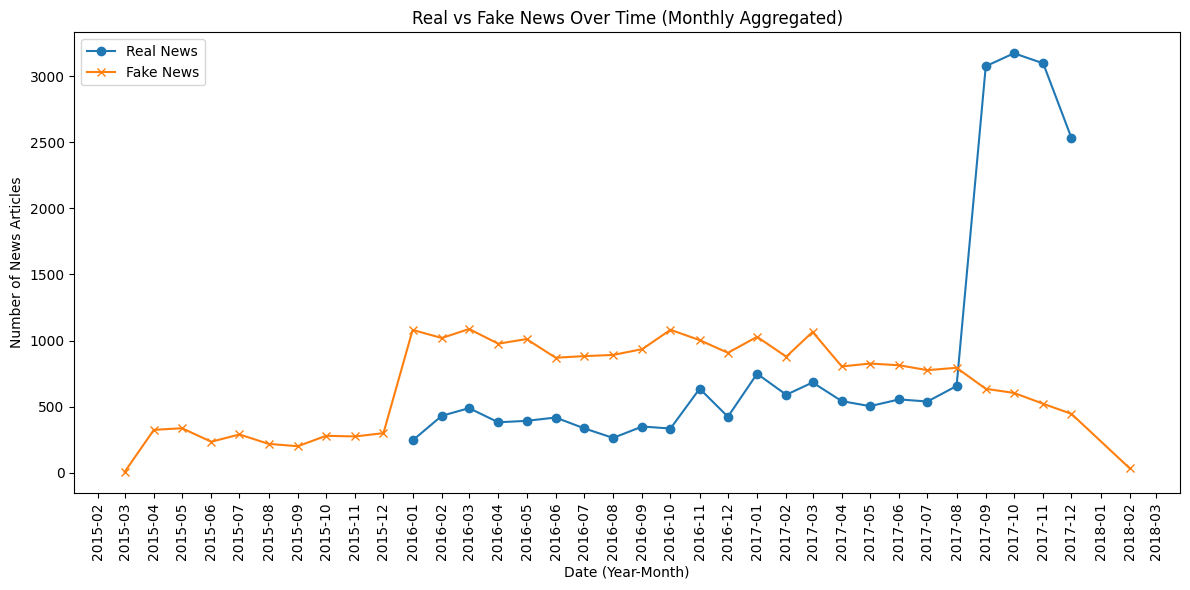

In [10]:
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fake = news[news['Fake or Real'] == 'F'].copy()
real = news[news['Fake or Real'] == 'R'].copy()

real['year_month'] = real['date'].dt.to_period('M')
fake['year_month'] = fake['date'].dt.to_period('M')

real_grouped = real.groupby('year_month').apply(len)
fake_grouped = fake.groupby('year_month').apply(len)

plt.figure(figsize=(12, 6))

plt.plot(real_grouped.index.to_timestamp(), real_grouped.values, label='Real News', marker='o')
plt.plot(fake_grouped.index.to_timestamp(), fake_grouped.values, label='Fake News', marker='x')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Real vs Fake News Over Time (Monthly Aggregated)')
plt.ylabel('Number of News Articles')
plt.xlabel('Date (Year-Month)')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()

### Plot by DayOfWeek (may be the first parameter?)

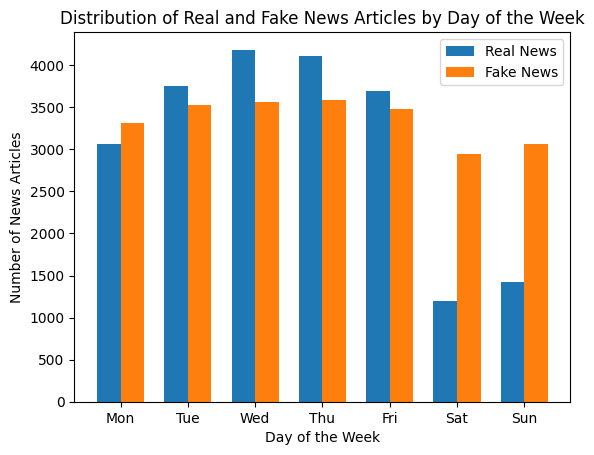

In [11]:

mask_real = news['Fake or Real'] == 'R'
mask_fake = news['Fake or Real'] == 'F'

positions = np.arange(1, 8) 
width = 0.35 

plt.bar(positions - width/2, news[mask_real]['DayOfWeek'].value_counts().sort_index(), 
        width=width, label='Real News', align='center')

plt.bar(positions + width/2, news[mask_fake]['DayOfWeek'].value_counts().sort_index(), 
        width=width, label='Fake News', align='center')

plt.xticks(positions, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.xlabel('Day of the Week')
plt.ylabel('Number of News Articles')
plt.title('Distribution of Real and Fake News Articles by Day of the Week')
plt.legend()

subject
Government News    1568
Middle-east         778
News               9050
US_News             783
left-news          4456
politics           6836
Name: date, dtype: int64


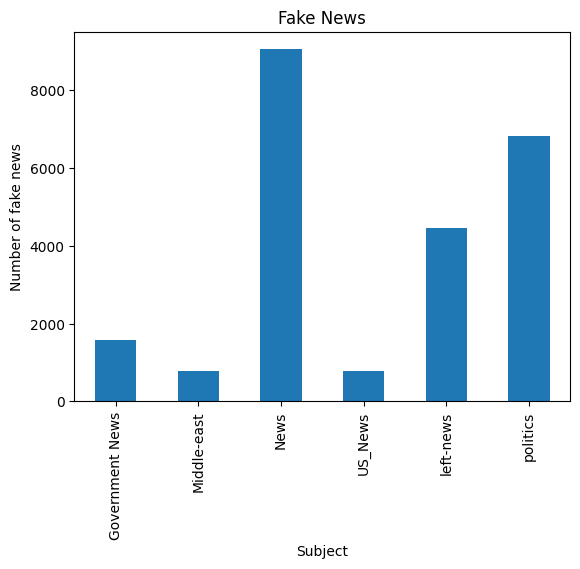

In [12]:

fake = news[news['Fake or Real'] == 'F']
print(fake.groupby('subject')['date'].count())

fake.groupby('subject')['date'].count().plot(kind='bar')

plt.title('Fake News')
plt.ylabel('Number of fake news')
plt.xlabel('Subject')
plt.xticks(rotation=90)
plt.show()

subject
politicsNews    11272
worldnews       10145
Name: date, dtype: int64


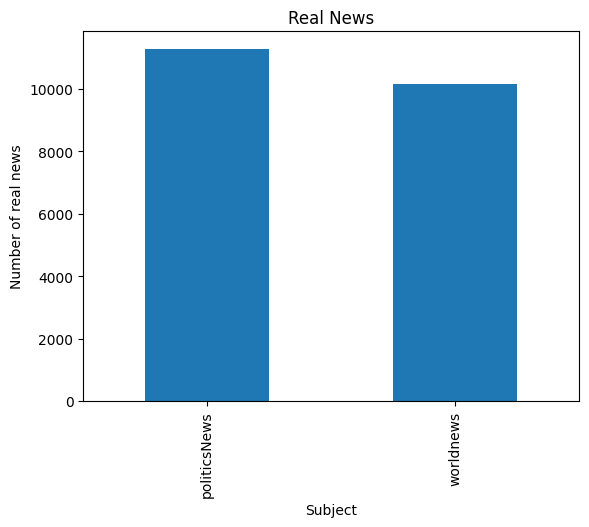

In [13]:

real = news[news['Fake or Real'] == 'R']
print(real.groupby('subject')['date'].count())

real.groupby('subject')['date'].count().plot(kind='bar')

plt.title('Real News')
plt.ylabel('Number of real news')
plt.xlabel('Subject')
plt.xticks(rotation=90)
plt.show()


In [14]:

news.drop(["subject"],axis=1,inplace=True)
news.drop(["date"], axis=1, inplace=True)
news.head()

,title,text,Fake or Real,DayOfWeek
0,What Will Happen to Your Guns Under President ...,21st Century Wire says Legacy note to Obama s ...,F,2
1,SECOND MAJOR MAKEUP MANUFACTURER Chooses Man W...,Makeup Artist Manny Gutierrez is the first man...,F,4
2,"Russia, Turkey hope Astana peace talks will le...",MOSCOW (Reuters) - Russian President Vladimir ...,R,5
3,Here’s A Look At The Obama Administration Sca...,"Eight years ago, the right-wing media was obse...",F,5
4,WATCH REAGAN WARN US AND DRAW BATTLE LINES…Tru...,President Reagan Warned Of The Dangers Of Libe...,F,7


## Text Cleaning

In [15]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop = stopwords.words('english')

def clean_text(text):
    text = text.lower()
    
    text = re.sub(r"[\'\"\’\“\”]", "", text)
    
    text_no_special_entities = re.sub(r'\&\w*;|#\w*|@\w*','', text)
    
    text_no_tickers = re.sub(r'\$\w*', '', text_no_special_entities)
    
    text_no_hyperlinks = re.sub(r'http\S+|www\S+', '', text_no_tickers)
    
    text_no_small_words = re.sub(r'\b\w{1}\b', '', text_no_hyperlinks)
    
    text_no_whitespace = re.sub(r'\s\s+', ' ', text_no_small_words)
    text_no_whitespace = text_no_whitespace.lstrip(' ')
    
    tokens = word_tokenize(text_no_whitespace)

    list_no_stopwords = [i for i in tokens if i not in stop]

    list_no_punctuation = [re.sub(r'[^\w\s]', '', token) for token in list_no_stopwords]
    
    clean_str = ' '.join(list_no_punctuation)

    return clean_str.strip() 

news['text'] = news['text'].apply(clean_text)
news['title'] = news['title'].apply(clean_text)
news['text'] = news['title'] + ' ' + news['text']
news.drop(["title"], axis=1, inplace=True)
news.head()

,text,Fake or Real,DayOfWeek
0,happen guns president trump 21st century wire ...,F,2
1,second major makeup manufacturer chooses man r...,F,4
2,russia turkey hope astana peace talks lead co...,R,5
3,heres look obama administration scandal point ...,F,5
4,watch reagan warn us draw battle linestrump fi...,F,7


## Word analysis

C:\Users\86130\AppData\Local\Temp\ipykernel_73812\3008211404.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  word_count_dist = news.groupby(['word_count_category', 'Fake or Real']).size().unstack().fillna(0)


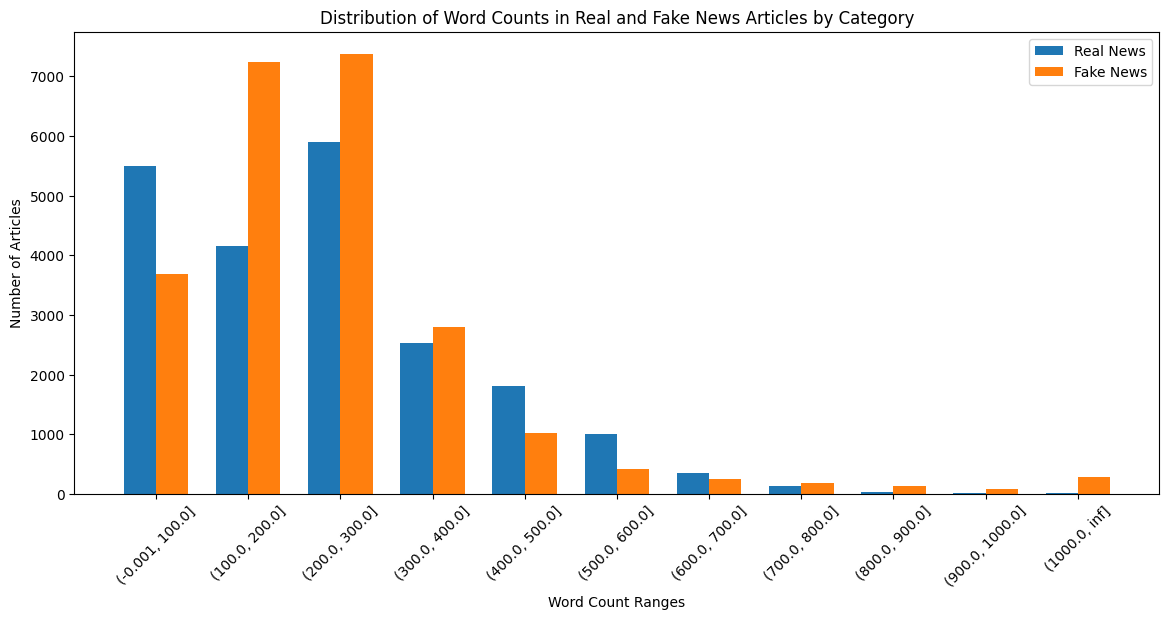

In [16]:

def count_word(text):
    words = text.split()
    return len(words)

news['WordCount'] = news['text'].apply(count_word)

real_news_word_counts = news[news['Fake or Real'] == 'R']['WordCount']
fake_news_word_counts = news[news['Fake or Real'] == 'F']['WordCount']

bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, np.inf] 

news['word_count_category'] = pd.cut(news['WordCount'], bins=bins, include_lowest=True)

word_count_dist = news.groupby(['word_count_category', 'Fake or Real']).size().unstack().fillna(0)

categories = word_count_dist.index.categories.astype(str)
x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 6))
rects1 = ax.bar(x - width/2, word_count_dist['R'], width, label='Real News')
rects2 = ax.bar(x + width/2, word_count_dist['F'], width, label='Fake News')

ax.set_xlabel('Word Count Ranges')
ax.set_ylabel('Number of Articles')
ax.set_title('Distribution of Word Counts in Real and Fake News Articles by Category')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.legend()


In [17]:
news

,text,Fake or Real,DayOfWeek,WordCount,word_count_category
0,happen guns president trump 21st century wire ...,F,2,386,"(300.0, 400.0]"
1,second major makeup manufacturer chooses man r...,F,4,76,"(-0.001, 100.0]"
2,russia turkey hope astana peace talks lead co...,R,5,64,"(-0.001, 100.0]"
3,heres look obama administration scandal point ...,F,5,219,"(200.0, 300.0]"
4,watch reagan warn us draw battle linestrump fi...,F,7,94,"(-0.001, 100.0]"
...,...,...,...,...,...
44883,iowa legislator leaves republican party trumps...,F,2,185,"(100.0, 200.0]"
44884,obama unveils wage insurance plan spur job see...,R,6,181,"(100.0, 200.0]"
44885,uruguay vice president quits amid probe use pu...,R,6,79,"(-0.001, 100.0]"
44886,peru president vowed free fujimori win support...,R,5,99,"(-0.001, 100.0]"


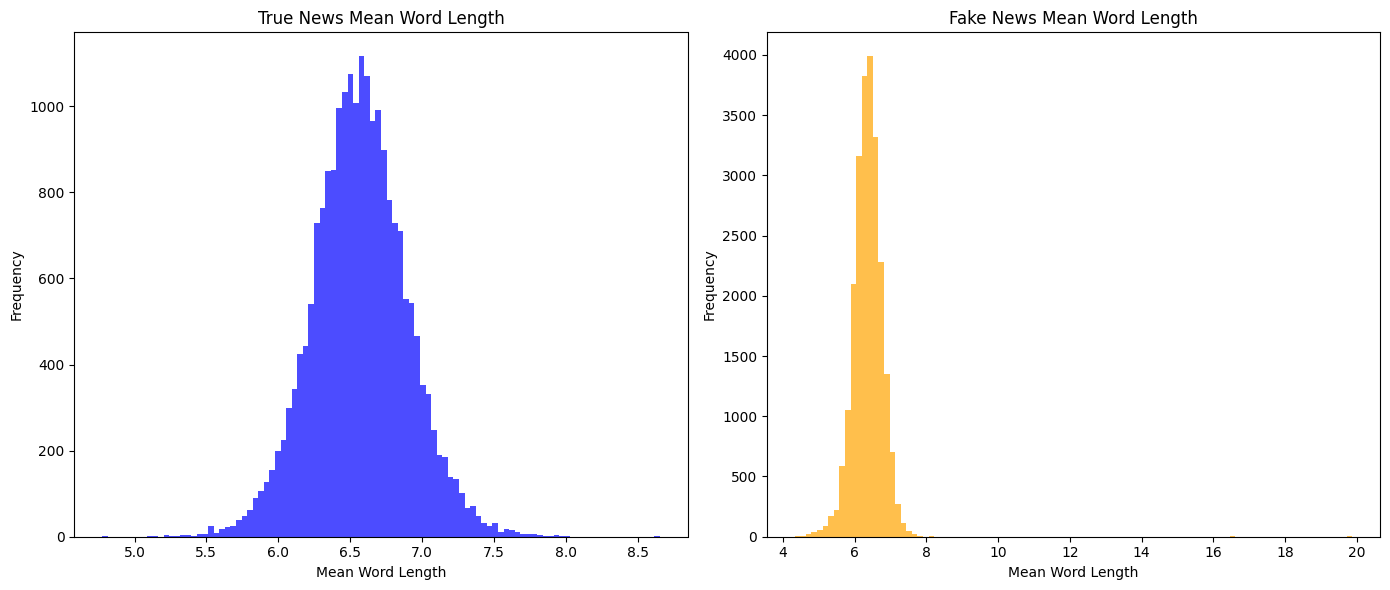

In [19]:

def mean_word_length(text):
    words = text.split() 
    if len(words) == 0:
        return 0
    word_lengths = [len(word) for word in words]
    return sum(word_lengths) / len(word_lengths)

news['mean_word_length'] = news['text'].apply(mean_word_length)

real_mean_word_lengths = news[news['Fake or Real'] == 'R']['mean_word_length']
fake_mean_word_lengths = news[news['Fake or Real'] == 'F']['mean_word_length']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].hist(real_mean_word_lengths, bins=100, color='blue', alpha=0.7)
axes[0].set_title('True News Mean Word Length')
axes[0].set_xlabel('Mean Word Length')
axes[0].set_ylabel('Frequency')

axes[1].hist(fake_mean_word_lengths, bins=100, color='orange', alpha=0.7)
axes[1].set_title('Fake News Mean Word Length')
axes[1].set_xlabel('Mean Word Length')
axes[1].set_ylabel('Frequency')

plt.tight_layout()

In [20]:
news

,text,Fake or Real,DayOfWeek,WordCount,word_count_category,mean_word_length
0,happen guns president trump 21st century wire ...,F,2,386,"(300.0, 400.0]",6.222798
1,second major makeup manufacturer chooses man r...,F,4,76,"(-0.001, 100.0]",6.394737
2,russia turkey hope astana peace talks lead co...,R,5,64,"(-0.001, 100.0]",6.562500
3,heres look obama administration scandal point ...,F,5,219,"(200.0, 300.0]",5.849315
4,watch reagan warn us draw battle linestrump fi...,F,7,94,"(-0.001, 100.0]",6.585106
...,...,...,...,...,...,...
44883,iowa legislator leaves republican party trumps...,F,2,185,"(100.0, 200.0]",6.437838
44884,obama unveils wage insurance plan spur job see...,R,6,181,"(100.0, 200.0]",6.513812
44885,uruguay vice president quits amid probe use pu...,R,6,79,"(-0.001, 100.0]",6.189873
44886,peru president vowed free fujimori win support...,R,5,99,"(-0.001, 100.0]",6.535354


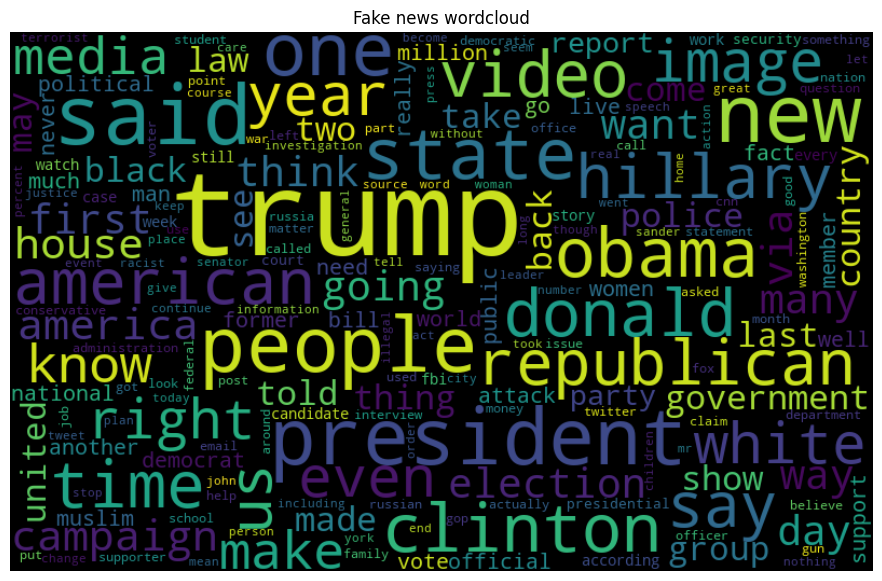

In [21]:

from wordcloud import WordCloud

fake_data = news[news["Fake or Real"] == "F"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110, collocations=False).generate(all_words)

plt.figure(figsize=(13,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Fake news wordcloud')
plt.show()

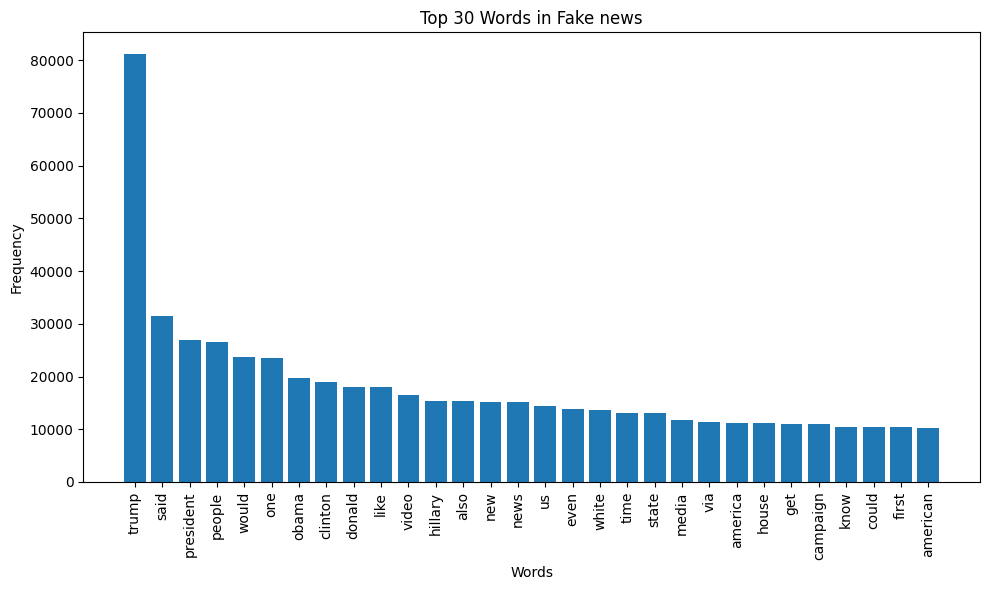

In [22]:

from collections import Counter
words = all_words.split()
word_frequency = Counter(words)
sorted_word_frequency = sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)

top_30_words_fake = [word for word, freq in sorted_word_frequency[:30]]
top_30_frequencies_fake = [freq for word, freq in sorted_word_frequency[:30]]

plt.figure(figsize=(10, 6))
plt.bar(top_30_words_fake, top_30_frequencies_fake)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Words in Fake news')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

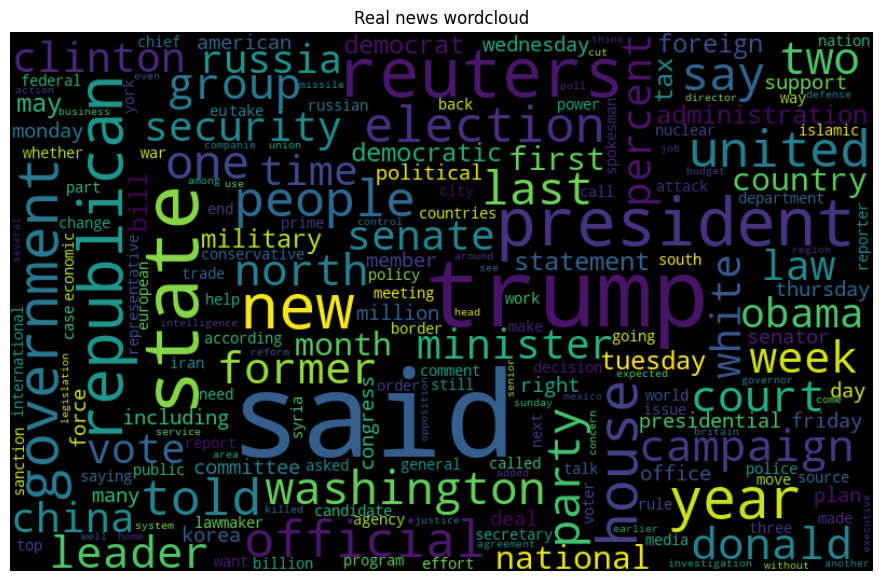

In [23]:

real_data = news[news["Fake or Real"] == "R"]
all_words = ' '.join([text for text in real_data.text])

wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110, collocations=False).generate(all_words)

plt.figure(figsize=(13,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Real news wordcloud")
plt.show()

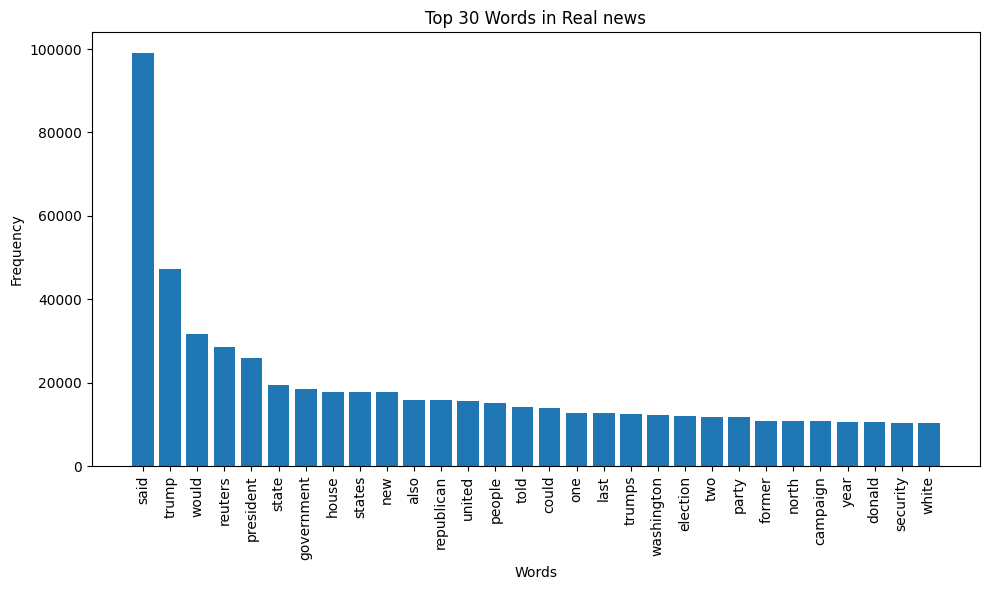

In [24]:

words = all_words.split()
word_frequency = Counter(words)
sorted_word_frequency = sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)

top_30_words_real = [word for word, freq in sorted_word_frequency[:30]]
top_30_frequencies_real = [freq for word, freq in sorted_word_frequency[:30]]

plt.figure(figsize=(10, 6))
plt.bar(top_30_words_real, top_30_frequencies_real)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Words in Real news')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### TFIDF

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

top_words = list(set(top_30_words_real + top_30_words_fake))

vectorizer = TfidfVectorizer(vocabulary=top_words)

X_tfidf = vectorizer.fit_transform(news['text'])
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_true = X_tfidf_df[top_30_words_real]
tfidf_fake = X_tfidf_df[top_30_words_fake]

sum_tfidf_true = tfidf_true.sum(axis=1)
sum_tfidf_fake = tfidf_fake.sum(axis=1)

news['tfidf_sum_top30_true'] = sum_tfidf_true
news['tfidf_sum_top30_fake'] = sum_tfidf_fake

news

,text,Fake or Real,DayOfWeek,WordCount,word_count_category,mean_word_length,tfidf_sum_top30_true,tfidf_sum_top30_fake
0,happen guns president trump 21st century wire ...,F,2,386,"(300.0, 400.0]",6.222798,1.480714,3.364515
1,second major makeup manufacturer chooses man r...,F,4,76,"(-0.001, 100.0]",6.394737,2.080914,2.067910
2,russia turkey hope astana peace talks lead co...,R,5,64,"(-0.001, 100.0]",6.562500,2.684667,2.064280
3,heres look obama administration scandal point ...,F,5,219,"(200.0, 300.0]",5.849315,1.706423,3.066847
4,watch reagan warn us draw battle linestrump fi...,F,7,94,"(-0.001, 100.0]",6.585106,0.527433,2.378821
...,...,...,...,...,...,...,...,...
44883,iowa legislator leaves republican party trumps...,F,2,185,"(100.0, 200.0]",6.437838,2.731368,1.664121
44884,obama unveils wage insurance plan spur job see...,R,6,181,"(100.0, 200.0]",6.513812,2.450798,2.162832
44885,uruguay vice president quits amid probe use pu...,R,6,79,"(-0.001, 100.0]",6.189873,2.109903,1.314467
44886,peru president vowed free fujimori win support...,R,5,99,"(-0.001, 100.0]",6.535354,2.521832,1.163726


### N-gram

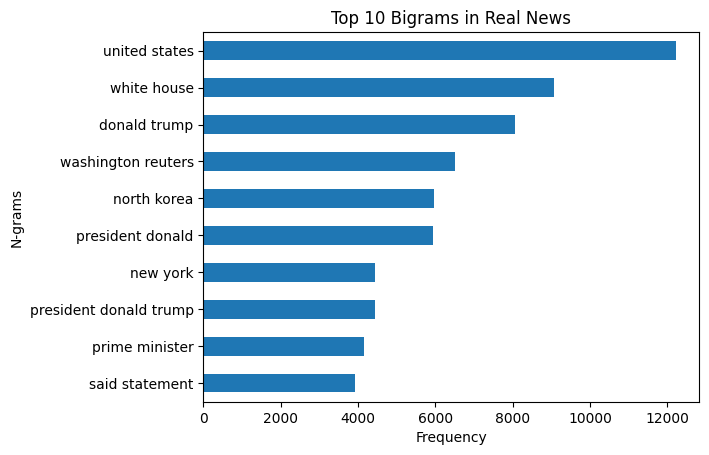

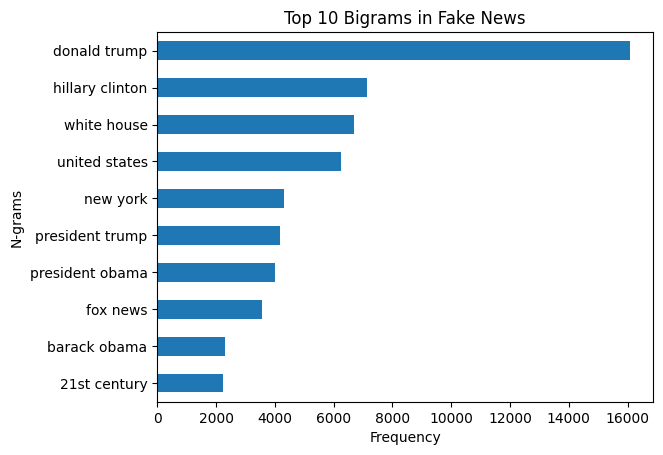

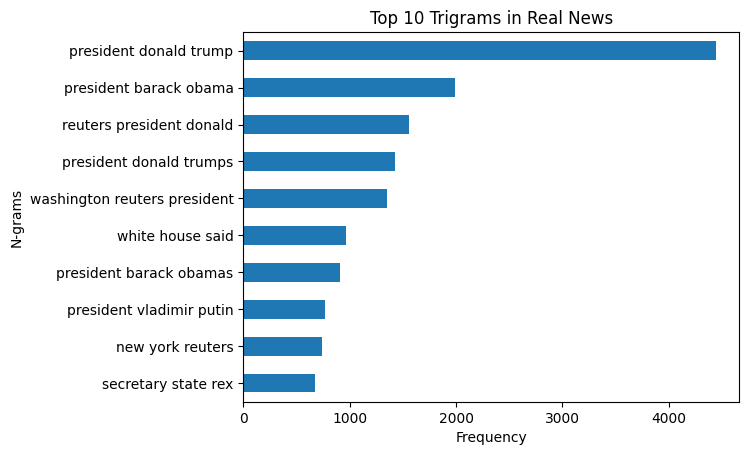

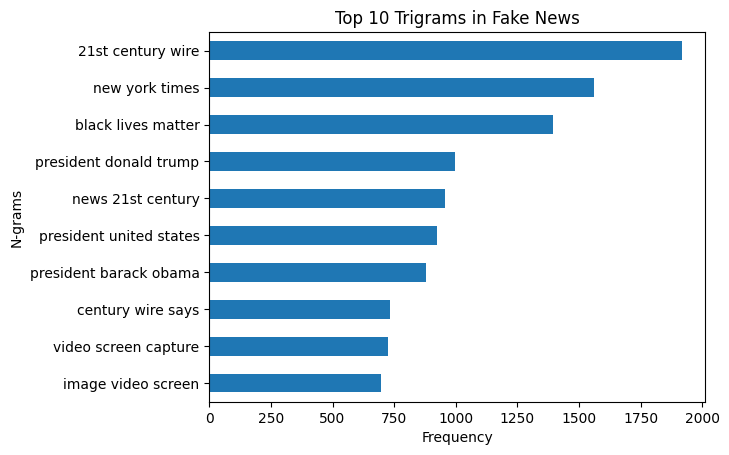

In [26]:

from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=None, ngram_range=(2,2)):
    """
    Generate and return the top n n-grams.
    :param corpus: list of text entries to analyze
    :param n: number of top n-grams to return
    :param ngram_range: range of n-gram (e.g., (2,2) for bigrams, (3,3) for trigrams)
    :return: DataFrame with top n-grams and their counts
    """
    vec = CountVectorizer(stop_words='english', ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_ngrams = words_freq[:n]
    top_df = pd.DataFrame(top_ngrams)
    top_df.columns=["N-gram", "Frequency"]
    return top_df

real_news = news[news['Fake or Real'] == 'R']['text']
fake_news = news[news['Fake or Real'] == 'F']['text']

top_10_3grams_real = get_top_ngrams(real_news, n=10, ngram_range=(3, 3))
top_10_2grams_real = get_top_ngrams(real_news, n=10, ngram_range=(2, 3))

top_10_3grams_fake = get_top_ngrams(fake_news, n=10, ngram_range=(3, 3))
top_10_2grams_fake = get_top_ngrams(fake_news, n=10, ngram_range=(2, 3))

def plot_top_ngrams(top_ngrams_df, title="Top N-grams"):
    top_ngrams_df.sort_values(by="Frequency").plot.barh(x="N-gram", y="Frequency", legend=False)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('N-grams')
    plt.show()

plot_top_ngrams(top_10_2grams_real, "Top 10 Bigrams in Real News")
plot_top_ngrams(top_10_2grams_fake, "Top 10 Bigrams in Fake News")
plot_top_ngrams(top_10_3grams_real, "Top 10 Trigrams in Real News")
plot_top_ngrams(top_10_3grams_fake, "Top 10 Trigrams in Fake News")

#from sklearn.feature_extraction.text import CountVectorizer

 instead of using tfidf, we will use frequency, because tfidf is too small
top_10_3grams_real_list = list(top_10_3grams_real['N-gram'])
top_10_3grams_fake_list = list(top_10_3grams_fake['N-gram'])

top_10_2grams_real_list = list(top_10_2grams_real['N-gram'])
top_10_2grams_fake_list = list(top_10_2grams_fake['N-gram'])

top_10_ngram_fake = list(set(top_10_3grams_fake_list + top_10_2grams_fake_list))
top_10_ngram_real = list(set(top_10_3grams_real_list + top_10_2grams_real_list))

top_ngrams = list(set(top_10_3grams_real_list + top_10_3grams_fake_list + top_10_2grams_real_list + top_10_2grams_fake_list))

# Initialize the CountVectorizer with the combined list of 3-grams
vectorizer = CountVectorizer(ngram_range=(2, 3), vocabulary=top_ngrams)

X_counts = vectorizer.fit_transform(news['text'])

counts_df = pd.DataFrame(X_counts.toarray(), columns=vectorizer.get_feature_names_out())

# Sum the frequencies for the top 10 3-grams of real news
news['count_sum_top10_grams_real'] = counts_df[top_10_ngram_real].sum(axis=1)

news['count_sum_top10_grams_fake'] = counts_df[top_10_ngram_fake].sum(axis=1)

news

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

top_10_3grams_real_list = list(top_10_3grams_real['N-gram'])
top_10_3grams_fake_list = list(top_10_3grams_fake['N-gram'])

top_10_2grams_real_list = list(top_10_2grams_real['N-gram'])
top_10_2grams_fake_list = list(top_10_2grams_fake['N-gram'])

top_10_ngram_fake = list(set(top_10_3grams_fake_list + top_10_2grams_fake_list))
top_10_ngram_real = list(set(top_10_3grams_real_list + top_10_2grams_real_list))

top_ngrams = list(set(top_10_3grams_real_list + top_10_3grams_fake_list + top_10_2grams_real_list + top_10_2grams_fake_list))

vectorizer = TfidfVectorizer(ngram_range=(2, 3), vocabulary=top_ngrams)

X_counts = vectorizer.fit_transform(news['text'])

counts_df = pd.DataFrame(X_counts.toarray(), columns=vectorizer.get_feature_names_out())

news['tfidf_sum_top10_grams_real'] = counts_df[top_10_ngram_real].sum(axis=1)

news['tfidf_sum_top10_grams_fake'] = counts_df[top_10_ngram_fake].sum(axis=1)

news

,text,Fake or Real,DayOfWeek,WordCount,word_count_category,mean_word_length,tfidf_sum_top30_true,tfidf_sum_top30_fake,tfidf_sum_top10_grams_real,tfidf_sum_top10_grams_fake
0,happen guns president trump 21st century wire ...,F,2,386,"(300.0, 400.0]",6.222798,1.480714,3.364515,0.000000,2.516468
1,second major makeup manufacturer chooses man r...,F,4,76,"(-0.001, 100.0]",6.394737,2.080914,2.067910,0.000000,0.000000
2,russia turkey hope astana peace talks lead co...,R,5,64,"(-0.001, 100.0]",6.562500,2.684667,2.064280,1.394048,0.000000
3,heres look obama administration scandal point ...,F,5,219,"(200.0, 300.0]",5.849315,1.706423,3.066847,1.458923,1.896485
4,watch reagan warn us draw battle linestrump fi...,F,7,94,"(-0.001, 100.0]",6.585106,0.527433,2.378821,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
44883,iowa legislator leaves republican party trumps...,F,2,185,"(100.0, 200.0]",6.437838,2.731368,1.664121,0.558025,1.387849
44884,obama unveils wage insurance plan spur job see...,R,6,181,"(100.0, 200.0]",6.513812,2.450798,2.162832,1.240140,1.693560
44885,uruguay vice president quits amid probe use pu...,R,6,79,"(-0.001, 100.0]",6.189873,2.109903,1.314467,0.000000,0.000000
44886,peru president vowed free fujimori win support...,R,5,99,"(-0.001, 100.0]",6.535354,2.521832,1.163726,0.000000,0.000000


### Drop no using columns

In [28]:
news.drop(["text"], axis=1, inplace=True)
news.drop(["WordCount"], axis=1, inplace=True)

In [29]:
news

,Fake or Real,DayOfWeek,word_count_category,mean_word_length,tfidf_sum_top30_true,tfidf_sum_top30_fake,tfidf_sum_top10_grams_real,tfidf_sum_top10_grams_fake
0,F,2,"(300.0, 400.0]",6.222798,1.480714,3.364515,0.000000,2.516468
1,F,4,"(-0.001, 100.0]",6.394737,2.080914,2.067910,0.000000,0.000000
2,R,5,"(-0.001, 100.0]",6.562500,2.684667,2.064280,1.394048,0.000000
3,F,5,"(200.0, 300.0]",5.849315,1.706423,3.066847,1.458923,1.896485
4,F,7,"(-0.001, 100.0]",6.585106,0.527433,2.378821,0.000000,0.000000
...,...,...,...,...,...,...,...,...
44883,F,2,"(100.0, 200.0]",6.437838,2.731368,1.664121,0.558025,1.387849
44884,R,6,"(100.0, 200.0]",6.513812,2.450798,2.162832,1.240140,1.693560
44885,R,6,"(-0.001, 100.0]",6.189873,2.109903,1.314467,0.000000,0.000000
44886,R,5,"(-0.001, 100.0]",6.535354,2.521832,1.163726,0.000000,0.000000


### Build and train the model

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first')
categorical_features = encoder.fit_transform(news[['DayOfWeek', 'word_count_category']]).toarray()

encoded_df = pd.DataFrame(categorical_features, columns=encoder.get_feature_names_out())

X = pd.concat([encoded_df, news[['mean_word_length', 'tfidf_sum_top30_true', 'tfidf_sum_top30_fake', 'tfidf_sum_top10_grams_real', 'tfidf_sum_top10_grams_fake']]], axis=1)

y = news['Fake or Real'].map({'F': 0, 'R': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.5f}")

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.5f}")


Training Accuracy: 0.90254
Test Accuracy: 0.90305


### ROC curve


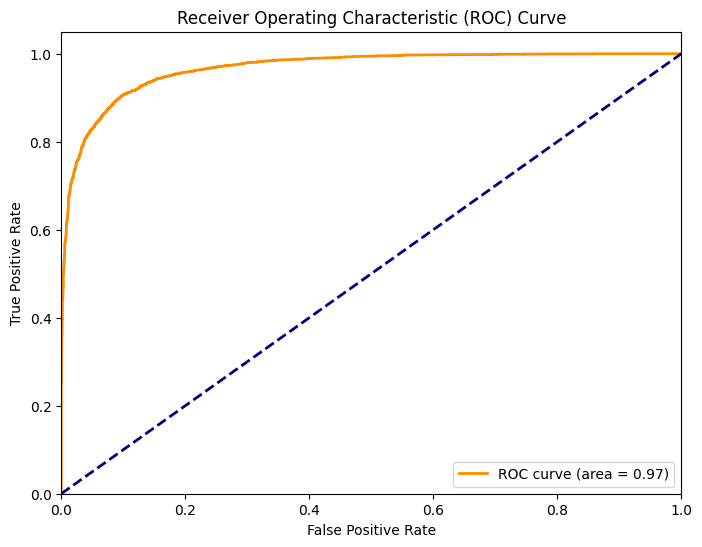

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Confusion matrix

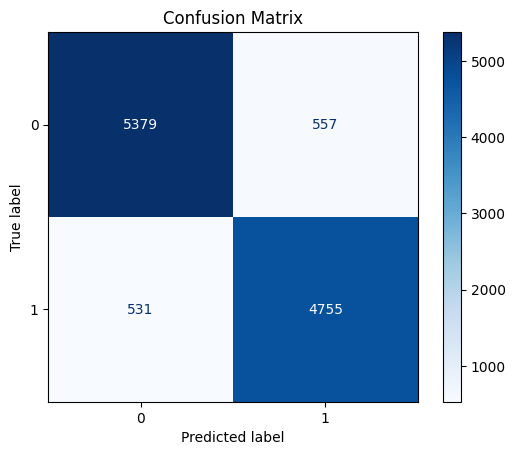

In [32]:
cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [33]:
#news.to_csv('praw_traned.csv', index=False)